Assignment 3: Making a pie chart
Author: Marcella Morgan

I this assignment I will import a data set and make a pie chart

In [20]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read in files with pandas
df = pd.read_csv('https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download', index_col=0) #the first row is not data
df

,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
Index,,,,,,,,
1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer
...,...,...,...,...,...,...,...,...
996,fedF4c7Fd9e7cFa,Kurt,Bryant,Female,lyonsdaisy@example.net,021.775.2933,1959-01-05,Personnel officer
997,ECddaFEDdEc4FAB,Donna,Barry,Female,dariusbryan@example.com,001-149-710-7799x721,2001-10-06,Education administrator
998,2adde51d8B8979E,Cathy,Mckinney,Female,georgechan@example.org,+1-750-774-4128x33265,1918-05-13,Commercial/residential surveyor


In [4]:
df.describe()


,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,526,628,2,1000,1000,991,519
top,8717bbf45cCDbEe,Lydia,Duke,Male,pwarner@example.org,857.139.8239,1955-07-31,Paediatric nurse
freq,1,6,6,506,1,1,2,7


In [18]:
#emails = ["Email"]
#df = pd.read_csv('https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download', index_col=0, usecols=emails) 
#df

email_domain = df['Email'].str.split('@').str[1]
print (email_domain)

Index
1       example.org
2       example.net
3       example.org
4       example.com
5       example.net
           ...     
996     example.net
997     example.com
998     example.org
999     example.net
1000    example.org
Name: Email, Length: 1000, dtype: object


ValueError: could not convert string to float: 'example.org'

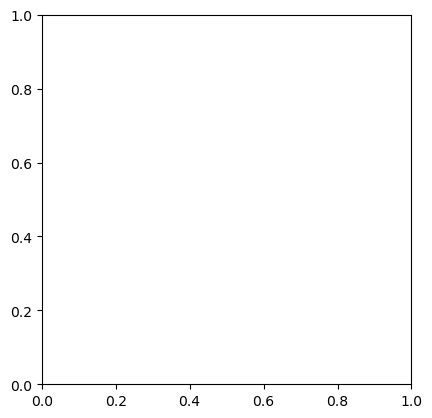

In [22]:
fig, ax = plt.subplots()
labels = 'example.org', 'example.net', 'example.com'
plt.pie(email_domain) 

plt.show()